Heart Disease Prediction Using Machine Learning and Deep Learning

In [230]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline


In [231]:
# Data Loading from csv file to dataframe 
df = pd.read_csv('/content/heart_disease_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [232]:
# find shape of data
print('shape of data: ',df.shape)


print('\n Target values -> 0 = Healthy patient  , 1= Heart patient')
print(df.target.value_counts())

shape of data:  (303, 14)

 Target values -> 0 = Healthy patient  , 1= Heart patient
1    165
0    138
Name: target, dtype: int64


Feature Selection

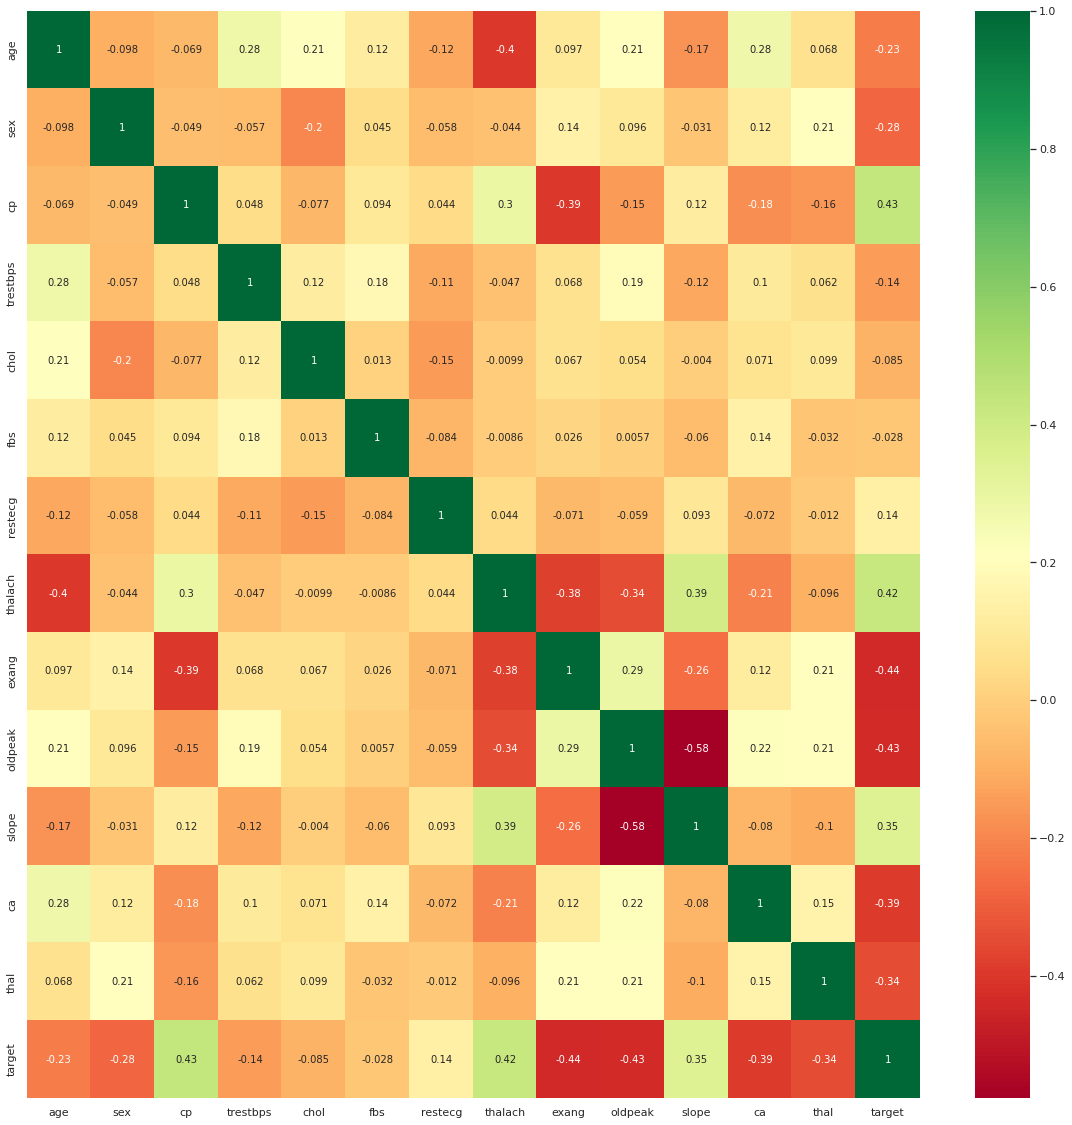

In [233]:
import seaborn as sns

#obtain the correlation of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
df.drop('target', axis=1).corrwith(df.target)

#define figure size
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

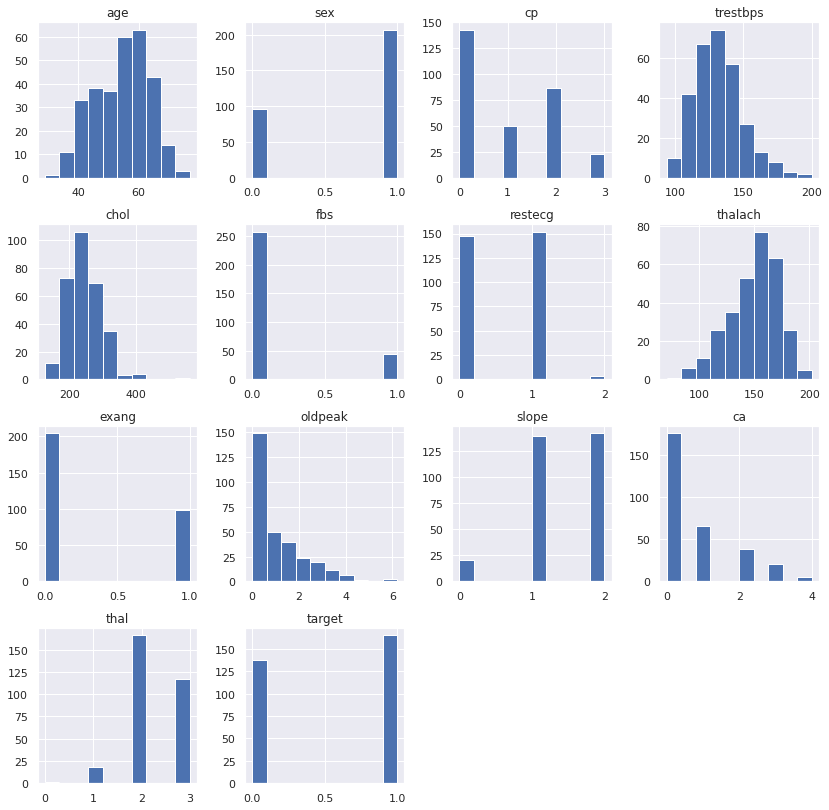

In [234]:
#define figure size
sns.set(rc={"figure.figsize":(14, 14)})

df.hist()
plt.show()

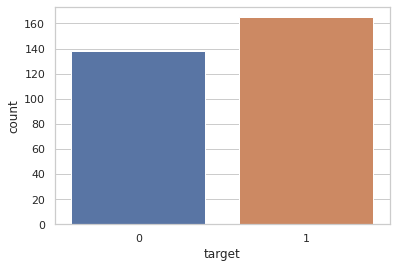

In [235]:
# Data distribution is not normalized
# heart disease occurred 54.46% of the time in the dataset, 
# whilst 45.54% was the no heart disease. 
# scale the values before training the machine leraning models.

#define figure size
sns.set(rc={"figure.figsize":(6, 4)})

sns.set_style('whitegrid')
sns.countplot(x='target',data=df)
plt.show()

In [236]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Convert into dummy to scale the values
data = pd.get_dummies(df,columns = ['sex' , 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

#standard scaler method used to scale down the data so that it won’t raise the outliers.
s_scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

data[columns_to_scale] = s_scaler.fit_transform(data[columns_to_scale])
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [237]:
# Features of data
X = data.drop(columns='target', axis=1)

print('<------------ Target Values --------------->')
# Target values
Y = data['target']
print(Y)

<------------ Target Values --------------->
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [238]:
from sklearn.model_selection import train_test_split
from collections import Counter

#Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)
print('Train Labels:', Counter(Y_train),'\nTest Labels:', Counter(Y_test))

(303, 30) (242, 30) (61, 30)
Train Labels: Counter({1: 132, 0: 110}) 
Test Labels: Counter({1: 33, 0: 28})


1. Logistic Regression

In [239]:
from sklearn.linear_model import LogisticRegression
#Model Training
lrModel = LogisticRegression(solver='liblinear')

# training the LogisticRegression model with Training data
lrModel.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [240]:
#Performance Evaluation of training data

X_train_prediction = lrModel.predict(X_train)
lr_training_data_accuracy = accuracy_score(X_train_prediction, Y_train) * 100
lrModel_train_report = pd.DataFrame(classification_report(Y_train, X_train_prediction, output_dict=True))


print("<---------- Train Result (Logistic Regression) -------->")
print(f"Accuracy Score: {accuracy_score(X_train_prediction,Y_train) * 100:.2f}%")
print("---------------------------------------------------------")
print(f"Classification Report:\n{lrModel_train_report}")
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n {confusion_matrix(X_train_prediction,Y_train)}\n")

<---------- Train Result (Logistic Regression) -------->
Accuracy Score: 88.43%
---------------------------------------------------------
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.901961    0.871429  0.884298    0.886695      0.885307
recall       0.836364    0.924242  0.884298    0.880303      0.884298
f1-score     0.867925    0.897059  0.884298    0.882492      0.883816
support    110.000000  132.000000  0.884298  242.000000    242.000000
---------------------------------------------------------
Confusion Matrix: 
 [[ 92  10]
 [ 18 122]]



In [241]:
#Performance Evaluation of Test data

X_test_prediction = lrModel.predict(X_test)
lr_test_data_accuracy = accuracy_score(X_test_prediction, Y_test) * 100
lrModel_test_report = pd.DataFrame(classification_report(X_test_prediction,Y_test, output_dict=True))


print("<---------- Test Result (Logistic Regression) -------->")
print(f"Accuracy Score: {accuracy_score(X_test_prediction,Y_test) * 100:.2f}%")
print("---------------------------------------------------------")
print(f"Classification Report:\n{lrModel_test_report}")
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n {confusion_matrix(X_test_prediction,Y_test)}\n")

<---------- Test Result (Logistic Regression) -------->
Accuracy Score: 83.61%
---------------------------------------------------------
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.857143   0.818182  0.836066   0.837662      0.837343
recall      0.800000   0.870968  0.836066   0.835484      0.836066
f1-score    0.827586   0.843750  0.836066   0.835668      0.835801
support    30.000000  31.000000  0.836066  61.000000     61.000000
---------------------------------------------------------
Confusion Matrix: 
 [[24  6]
 [ 4 27]]



In [242]:
lr_results_df = pd.DataFrame(data=[["Logistic Regression", lr_training_data_accuracy, lr_test_data_accuracy]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
lr_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.429752,83.606557


KNN (K- Nearest Neighbors)

In [243]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
# Hyper-parameter Tuning for Number of Neighbors
neighbors = range(1, 25)

for k in neighbors:
    knnTuneModel = KNeighborsClassifier(n_neighbors=k)
    knnTuneModel.fit(X_train, Y_train)
    train_score.append(accuracy_score(Y_train, knnTuneModel.predict(X_train)))
    test_score.append(accuracy_score(Y_test, knnTuneModel.predict(X_test)))

Maximum KNN score on the test data: 83.61%


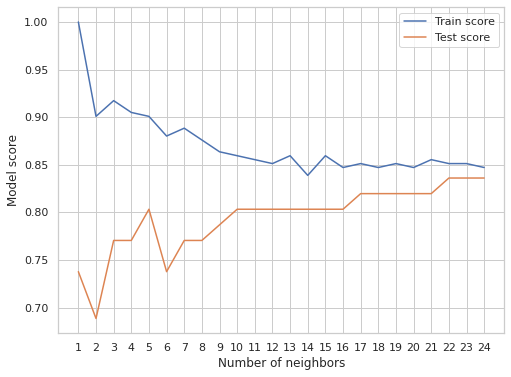

In [244]:
plt.figure(figsize=(8, 6))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")

plt.xticks(np.arange(1, 25, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [245]:
# After Analyzing the plot, we can check the testing accuracy is constant after Number of neighbors = 22
# so we choose value of n_neighbors= 22
knnModel = KNeighborsClassifier(n_neighbors=22)
knnModel.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=22)

In [246]:
#Performance Evaluation of training data

X_train_prediction = knnModel.predict(X_train)
knn_training_data_accuracy = accuracy_score(X_train_prediction, Y_train) * 100
knnModel_train_report = pd.DataFrame(classification_report(Y_train, X_train_prediction, output_dict=True))


print("<---------- Train Result (KNN) -------->")
print(f"Accuracy Score: {accuracy_score(X_train_prediction,Y_train) * 100:.2f}%")
print("---------------------------------------------------------")
print(f"Classification Report:\n{knnModel_train_report}")
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n {confusion_matrix(X_train_prediction,Y_train)}\n")

<---------- Train Result (KNN) -------->
Accuracy Score: 85.12%
---------------------------------------------------------
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.885417    0.828767   0.85124    0.857092      0.854517
recall       0.772727    0.916667   0.85124    0.844697      0.851240
f1-score     0.825243    0.870504   0.85124    0.847873      0.849930
support    110.000000  132.000000   0.85124  242.000000    242.000000
---------------------------------------------------------
Confusion Matrix: 
 [[ 85  11]
 [ 25 121]]



In [247]:
#Performance Evaluation of Test data

X_test_prediction = knnModel.predict(X_test)
knn_test_data_accuracy = accuracy_score(X_test_prediction, Y_test) * 100
knnModel_test_report = pd.DataFrame(classification_report(X_test_prediction, Y_test, output_dict=True))


print("<---------- Test Result (KNN) -------->")
print(f"Accuracy Score: {accuracy_score(X_test_prediction,Y_test) * 100:.2f}%")
print("---------------------------------------------------------")
print(f"Classification Report:\n{knnModel_test_report}")
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n {confusion_matrix(X_test_prediction,Y_test)}\n")

<---------- Test Result (KNN) -------->
Accuracy Score: 83.61%
---------------------------------------------------------
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.857143   0.818182  0.836066   0.837662      0.837343
recall      0.800000   0.870968  0.836066   0.835484      0.836066
f1-score    0.827586   0.843750  0.836066   0.835668      0.835801
support    30.000000  31.000000  0.836066  61.000000     61.000000
---------------------------------------------------------
Confusion Matrix: 
 [[24  6]
 [ 4 27]]



In [248]:
knn_results_df = pd.DataFrame(data=[["KNN", knn_training_data_accuracy, knn_test_data_accuracy]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
knn_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,KNN,85.123967,83.606557


SVM

In [249]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svmModel = SVC(kernel='rbf', gamma=0.1, C=1.0)
svmModel.fit(X_train, Y_train)

SVC(gamma=0.1)

In [229]:
# Hyper-parameters tuning
params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}
svmTunedModel = SVC(kernel='rbf', gamma=0.1, C=1.0)
#Get the best parameters by doing exhaustive search over specified parameter values 
svmCv = GridSearchCV(svmTunedModel, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svmCv.fit(X_train, Y_train)
best_params = svmCv.best_params_
print(f"Best params: {best_params}")

# Train Model with Best hyper-parameters
svmTunedModel = SVC(**best_params)
svmTunedModel.fit(X_train, Y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


SVC(C=0.1, gamma=0.001, kernel='linear')

In [255]:
#Performance Evaluation of SVM training data

X_train_prediction = svmModel.predict(X_train)
svm_training_data_accuracy = accuracy_score(X_train_prediction, Y_train) * 100
svmModel_train_report = pd.DataFrame(classification_report(Y_train, X_train_prediction, output_dict=True))


print("<---------- Train Result (SVM) -------->")
print(f"Accuracy Score: {accuracy_score(X_train_prediction,Y_train) * 100:.2f}%")
print("---------------------------------------------------------")
print(f"Classification Report:\n{svmModel_train_report}")
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n {confusion_matrix(X_train_prediction,Y_train)}\n")

#Performance Evaluation of Tuned SVM training data

X_train_prediction = svmTunedModel.predict(X_train)
svm_tuned_training_data_accuracy = accuracy_score(X_train_prediction, Y_train) * 100
svmTunedModel_train_report = pd.DataFrame(classification_report(Y_train, X_train_prediction, output_dict=True))


print("<---------- Train Result (Tuned SVM) -------->")
print(f"Accuracy Score: {accuracy_score(X_train_prediction,Y_train) * 100:.2f}%")
print("---------------------------------------------------------")
print(f"Classification Report:\n{svmTunedModel_train_report}")
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n {confusion_matrix(X_train_prediction,Y_train)}\n")

<---------- Train Result (SVM) -------->
Accuracy Score: 92.98%
---------------------------------------------------------
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.969697    0.902098  0.929752    0.935897      0.932825
recall       0.872727    0.977273  0.929752    0.925000      0.929752
f1-score     0.918660    0.938182  0.929752    0.928421      0.929308
support    110.000000  132.000000  0.929752  242.000000    242.000000
---------------------------------------------------------
Confusion Matrix: 
 [[ 96   3]
 [ 14 129]]

<---------- Train Result (Tuned SVM) -------->
Accuracy Score: 88.43%
---------------------------------------------------------
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.901961    0.871429  0.884298    0.886695      0.885307
recall       0.836364    0.924242  0.884298    0.880303      0.884298
f1-score     0.867925    0.897059  0.88429

In [256]:
#Performance Evaluation of SVM Test data

X_test_prediction = svmModel.predict(X_test)
svm_test_data_accuracy = accuracy_score(X_test_prediction, Y_test) * 100
svmModel_test_report = pd.DataFrame(classification_report(X_test_prediction, Y_test, output_dict=True))


print("<---------- Test Result (SVM) -------->")
print(f"Accuracy Score: {accuracy_score(X_test_prediction,Y_test) * 100:.2f}%")
print("---------------------------------------------------------")
print(f"Classification Report:\n{svmModel_test_report}")
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n {confusion_matrix(X_test_prediction,Y_test)}\n")

#Performance Evaluation of Tuned SVM Test data

X_tuned_test_prediction = svmTunedModel.predict(X_test)
svm_tuned_test_data_accuracy = accuracy_score(X_tuned_test_prediction, Y_test) * 100
svmTunedModel_test_report = pd.DataFrame(classification_report(X_tuned_test_prediction, Y_test, output_dict=True))


print("<---------- Test Result (Tuned SVM) -------->")
print(f"Accuracy Score: {accuracy_score(X_tuned_test_prediction,Y_test) * 100:.2f}%")
print("---------------------------------------------------------")
print(f"Classification Report:\n{svmTunedModel_test_report}")
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n {confusion_matrix(X_tuned_test_prediction,Y_test)}\n")

<---------- Test Result (SVM) -------->
Accuracy Score: 80.33%
---------------------------------------------------------
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.821429   0.787879  0.803279   0.804654      0.804379
recall      0.766667   0.838710  0.803279   0.802688      0.803279
f1-score    0.793103   0.812500  0.803279   0.802802      0.802961
support    30.000000  31.000000  0.803279  61.000000     61.000000
---------------------------------------------------------
Confusion Matrix: 
 [[23  7]
 [ 5 26]]

<---------- Test Result (Tuned SVM) -------->
Accuracy Score: 80.33%
---------------------------------------------------------
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.821429   0.787879  0.803279   0.804654      0.804379
recall      0.766667   0.838710  0.803279   0.802688      0.803279
f1-score    0.793103   0.812500  0.803279   0.802802      0.802961
suppo

In [257]:
svm_results_df = pd.DataFrame(data=[["SVM", svm_training_data_accuracy, svm_test_data_accuracy]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

svm_tuned_results_df = pd.DataFrame(data=[["SVM Tuned", svm_tuned_training_data_accuracy, svm_tuned_test_data_accuracy]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

svm_results_df = svm_results_df.append(svm_tuned_results_df, ignore_index=True)
svm_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,SVM,92.975207,80.327869
1,SVM Tuned,88.429752,80.327869


In [258]:
# Model Comparison

all_models_df = lr_results_df
all_models_df = all_models_df.append(knn_results_df, ignore_index=True)
all_models_df = all_models_df.append(svm_results_df, ignore_index=True)

all_models_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.429752,83.606557
1,KNN,85.123967,83.606557
2,SVM,92.975207,80.327869
3,SVM Tuned,88.429752,80.327869


In [254]:
#Building a Predictive System
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knnModel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
